# Time Series Analysis in Python | Time Series Forecasting 

In [50]:
#import paskages
import numpy as np
import pandas as pd
from datetime import datetime

from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [21]:
#Load data
dataset = pd.read_csv("data/AirPassengers.csv")
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

In [23]:
indexes_dataset= dataset.set_index(['Month'])

In [25]:
indexes_dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


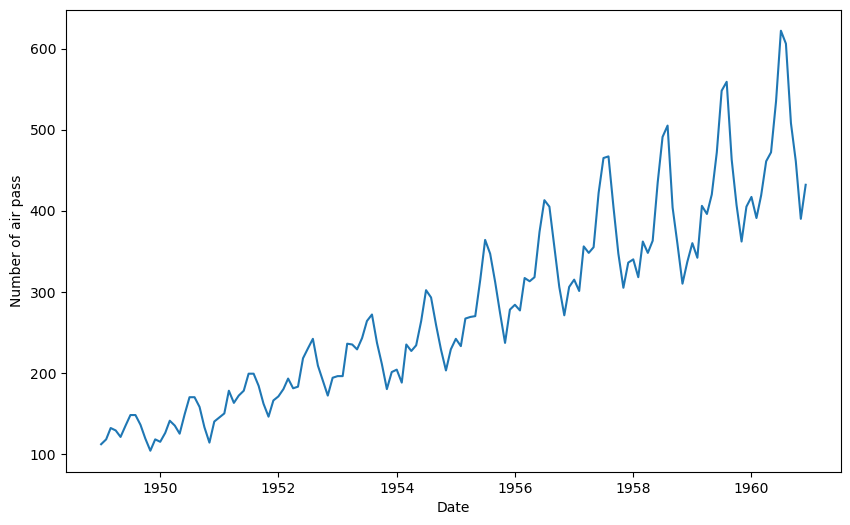

In [26]:
plt.xlabel("Date")
plt.ylabel("Number of air pass")
plt.plot(indexes_dataset)

In [43]:
rollmean= indexes_dataset.rolling(window=12).mean()

rolstd = indexes_dataset.rolling(window=12).std()
print(rollmean , rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [45]:
cc.values

array([[10],
       [12],
       [14],
       [16],
       [18],
       [20],
       [22],
       [24],
       [26],
       [28],
       [30]], dtype=int64)

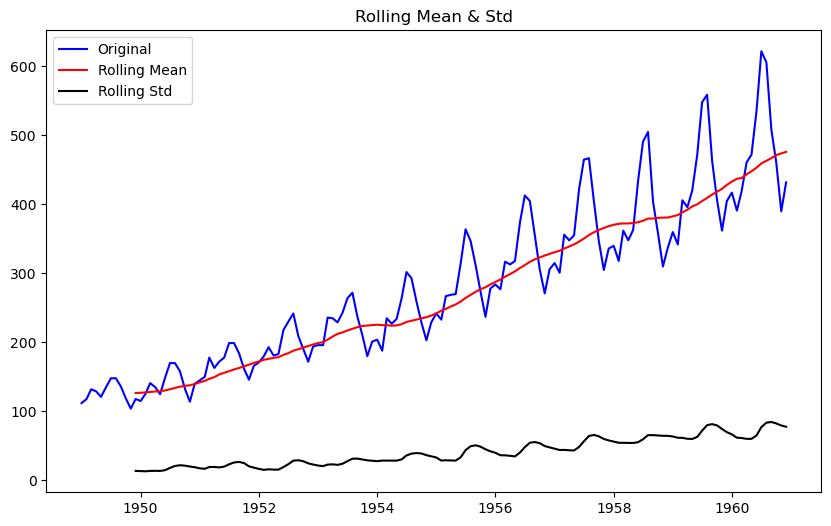

In [49]:
orig= plt.plot(indexes_dataset , color='blue' ,label='Original')
mean= plt.plot(rollmean , color='red' , label="Rolling Mean")
std= plt.plot(rolstd , color='black' ,label ='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean & Std")
plt.show(block=False)

In [55]:
print("Result of Dickey-Fuller Test : ")
dftest= adfuller(indexes_dataset['#Passengers'] , autolag="AIC")


Result of Dickey-Fuller Test : 


In [56]:
dfoutput = pd.Series(dftest[0:4] , index=['Test Statistic','p-value','#Logs Used',"Number of Observations Used"])

In [57]:
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key ]= value
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Logs Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


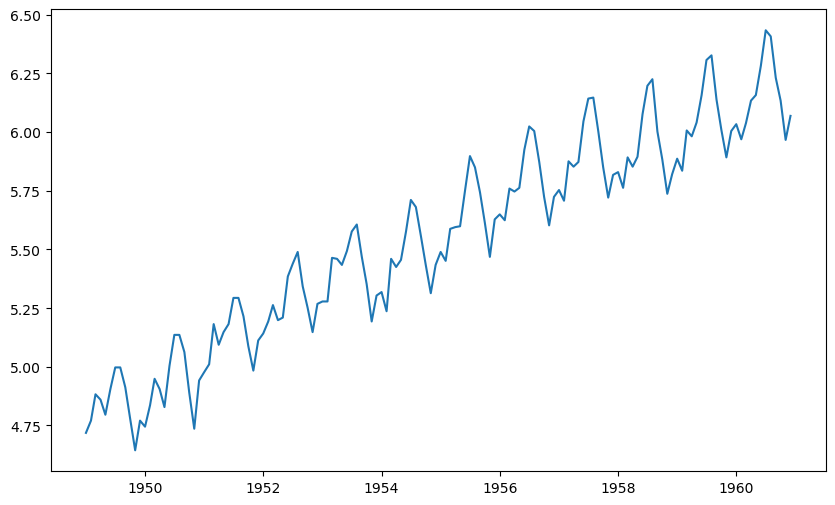

In [58]:
indexes_dataset_logscale = np.log(indexes_dataset)
plt.plot(indexes_dataset_logscale)

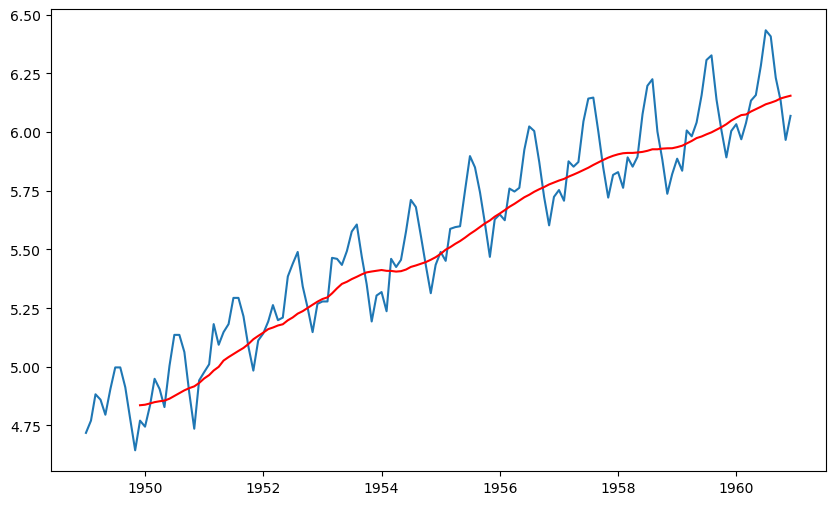

In [59]:
movingAverage = indexes_dataset_logscale.rolling(window=12).mean()
movingSTD = indexes_dataset_logscale.rolling(window=12).std()
plt.plot(indexes_dataset_logscale)
plt.plot(movingAverage , color='red')

In [61]:
datasetlogScalesMinusMovingAverage = indexes_dataset_logscale - movingAverage
datasetlogScalesMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [62]:
datasetlogScalesMinusMovingAverage.dropna(inplace=True)
datasetlogScalesMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635
